<a href="https://colab.research.google.com/github/rameshavinash94/Customer_Segmentation_Clustering/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estimating Delivery  date**

**Our Business Problem:**

Predicting Olist Delivery date


#### **IMPORTING LIBRARIES**

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering

**Load the datasets**

In [299]:
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payment= pd.read_csv('olist_order_payments_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category_name = pd.read_csv('product_category_name_translation.csv')

The ER/Data Modeling Structure of the Datasource
<div>
<img src='https://i.imgur.com/HRhd2Y0.png'>
</div>


*We won't require all the above datasets for our current business usecase for customer segmentation, so selectiong on the necessary files and carryon the EDA and data wrangling on the datasets.*

In [300]:
location_info = geolocation.groupby('geolocation_zip_code_prefix').max().drop_duplicates().reset_index()

In [301]:
location_info

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.549292,-46.633559,são paulo,SP
1,1002,-23.544641,-46.633180,são paulo,SP
2,1003,-23.548901,-46.634862,são paulo,SP
3,1004,-23.549181,-46.634057,são paulo,SP
4,1005,-23.548758,-46.634768,são paulo,SP
...,...,...,...,...,...
18993,99960,-27.953409,-52.016483,charrua,RS
18994,99965,-28.173892,-52.034367,agua santa,RS
18995,99970,-28.341329,-51.870397,ciríaco,RS
18996,99980,-28.386239,-51.779942,david canabarro,RS


In [302]:
customers_location=pd.merge(customers,location_info,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix').drop(columns=['geolocation_zip_code_prefix','geolocation_city','geolocation_state','customer_unique_id']).rename(columns={'geolocation_lat':'customer_lat','geolocation_lng':'customer_lng'})

In [303]:
customers_location

,customer_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,-20.468849,-47.382173
1,5dca924cc99eea2dc5ba40d11ec5dd0f,14409,franca,SP,-20.468849,-47.382173
2,661897d4968f1b59bfff74c7eb2eb4fc,14409,franca,SP,-20.468849,-47.382173
3,702b62324327ccba20f1be3465426437,14409,franca,SP,-20.468849,-47.382173
4,bdf997bae7ca819b0415f5174d6b4302,14409,franca,SP,-20.468849,-47.382173
...,...,...,...,...,...,...
99128,0b7a30ba373aeb55cf28add5b5477956,87145,paicandu,PR,-23.501620,-52.150755
99129,ff6b440b2465bfaef05c675efb48cd15,98860,eugenio de castro,RS,-28.525494,-54.144722
99130,3f7029d9b98a47370cd5f3a97adcbccd,5538,sao paulo,SP,-23.587405,-46.736508
99131,d9110683c7a282144e9fc97660026a28,74980,aparecida de goiania,GO,-16.821692,-49.243077


In [304]:
seller_locations=pd.merge(sellers,location_info,left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix').drop(columns=['geolocation_zip_code_prefix','geolocation_city','geolocation_state']).rename(columns={'geolocation_lat':'seller_lat','geolocation_lng':'seller_lng'})

In [305]:
seller_locations

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.884842,-47.045846
1,e0eabded302882513ced4ea3eb0c7059,13023,campinas,SP,-22.884842,-47.045846
2,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.347646,-46.920804
3,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.864365,-43.170800
4,1d2732ef8321502ee8488e8bed1ab8cd,20031,rio de janeiro,RJ,-22.864365,-43.170800
...,...,...,...,...,...,...
3083,f1fdf2d13186575751aa25876536d85c,5314,sao paulo,SP,-23.524115,-46.732087
3084,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,-23.434520,-51.859687
3085,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,-23.655006,-46.669658
3086,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,-31.709246,-52.307455


In [306]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [307]:
product_info = pd.merge(order_items,products)

In [308]:
order_product_info= pd.merge(orders,product_info)

In [309]:
customers_orders=pd.merge(customers_location,order_product_info)

In [310]:
final_Df = pd.merge(customers_orders,seller_locations)

In [311]:
final_Df = final_Df[final_Df['order_status']=='delivered']

In [312]:
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(np.array(lat2) - np.array(lat1))
   delta_lambda = np.radians(np.array(lon2) - np.array(lon1))
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res*0.6214, 2)

In [313]:
final_Df['distance']= haversine_distance(final_Df['customer_lat'],final_Df['customer_lng'],final_Df['seller_lat'],final_Df['seller_lng'])

In [314]:
final_Df

,customer_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,distance
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,-20.468849,-47.382173,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,-23.479473,-46.357851,218.13
1,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,-23.527788,-46.652997,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,8267.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP,-23.479473,-46.357851,19.00
2,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP,-23.493944,-46.172406,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,12160.0,56.0,51.0,28.0,8577,itaquaquecetuba,SP,-23.479473,-46.357851,11.79
3,f2fdb2409d1c2b5018b19767572978d6,30575,belo horizonte,MG,-19.818637,-43.929691,930fb714ff2992c4ff14bf920af830e6,delivered,2017-12-03 14:52:12,2017-12-03 14:59:22,...,11875.0,57.0,55.0,22.0,8577,itaquaquecetuba,SP,-23.479473,-46.357851,297.14
4,bf45a4524fffba803efa07f225cdfda5,20231,rio de janeiro,RJ,-22.908714,-43.182574,22167b7870f3c3b844087c5cbafac521,delivered,2018-03-07 17:56:08,2018-03-09 02:30:55,...,13175.0,57.0,55.0,22.0,8577,itaquaquecetuba,SP,-23.479473,-46.357851,205.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112052,d5d4cab5f11cc0e7d3c3882091d815c7,17320,mineiros do tiete,SP,-22.404782,-48.443557,deef94d95b5cf9c23e10621ad71a96b2,delivered,2017-03-18 11:40:26,2017-03-18 11:40:26,...,800.0,28.0,12.0,18.0,4164,sao paulo,SP,-23.621342,-46.605415,143.98
112053,1d3e643209846ffadac771cc5dc1ed4b,79320,corumba,MS,-19.014518,-57.643125,fd0342fda6ba083712b6ed0d4e6ac483,delivered,2018-07-23 16:24:27,2018-07-23 17:21:07,...,1450.0,60.0,5.0,30.0,83323,pinhais,PR,-25.432332,-49.183859,699.20
112054,124c96fb17eb2fc7f1611d3ca83d11ea,6887,itapecerica da serra,SP,-23.670573,-46.812776,90dbcfe5c30e1fd81cfaf22dc879e81b,delivered,2018-08-17 10:15:31,2018-08-17 10:30:16,...,2200.0,16.0,35.0,49.0,9380,maua,SP,-23.624618,-46.451878,23.06
112055,6d0c650bd30f4160b84c3634dd05b509,17533,marilia,SP,-22.154833,-49.935832,1175cf55b833823e2478956d6bb6e43c,delivered,2017-06-23 07:15:39,2017-06-23 07:25:15,...,700.0,16.0,16.0,16.0,87015,maringa,PR,-23.418061,-51.882767,151.66


In [315]:
final_Df.columns

Index(['customer_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'customer_lat', 'customer_lng', 'order_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'seller_lat',
       'seller_lng', 'distance'],
      dtype='object')

In [316]:
final_Df[['order_delivered_customer_date','order_purchase_timestamp','order_estimated_delivery_date']] = final_Df[['order_delivered_customer_date','order_purchase_timestamp','order_estimated_delivery_date']].apply(pd.to_datetime) # conversion required

final_Df['actual_delivery_timeline']=(final_Df['order_delivered_customer_date'] - final_Df['order_purchase_timestamp']).dt.days

final_Df['estimated_delivery_timeline']=(final_Df['order_delivered_customer_date'] - final_Df['order_estimated_delivery_date']).dt.days


In [317]:
cols = [col for col in final_Df.columns if col in ['actual_delivery_timeline', 'distance','product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm','estimated_delivery_timeline','order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date','order_approved_at']]

regression_columns = final_Df[cols]

In [318]:
regression_columns

,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,product_weight_g,product_length_cm,product_height_cm,product_width_cm,distance,actual_delivery_timeline,estimated_delivery_timeline
0,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,2017-06-05,8683.0,54.0,64.0,31.0,218.13,8.0,-11.0
1,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-14 17:58:51,2018-06-13,8267.0,52.0,52.0,17.0,19.00,26.0,1.0
2,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-28 16:04:25,2018-04-10,12160.0,56.0,51.0,28.0,11.79,14.0,-13.0
3,2017-12-03 14:52:12,2017-12-03 14:59:22,2017-12-28 19:17:34,2018-01-11,11875.0,57.0,55.0,22.0,297.14,25.0,-14.0
4,2018-03-07 17:56:08,2018-03-09 02:30:55,2018-03-26 14:05:48,2018-04-24,13175.0,57.0,55.0,22.0,205.48,18.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...
112052,2017-03-18 11:40:26,2017-03-18 11:40:26,2017-03-27 12:56:01,2017-04-06,800.0,28.0,12.0,18.0,143.98,9.0,-10.0
112053,2018-07-23 16:24:27,2018-07-23 17:21:07,2018-08-01 23:46:21,2018-08-14,1450.0,60.0,5.0,30.0,699.20,9.0,-13.0
112054,2018-08-17 10:15:31,2018-08-17 10:30:16,2018-08-21 19:29:03,2018-08-27,2200.0,16.0,35.0,49.0,23.06,4.0,-6.0
112055,2017-06-23 07:15:39,2017-06-23 07:25:15,2017-07-04 15:51:59,2017-07-18,700.0,16.0,16.0,16.0,151.66,11.0,-14.0


The formula to determine the density of an item is: LxWxH / 1728 = Cubic Feet (CU FT), Weight (Pounds)/CU FT = Density (#PCF)

In [319]:
def density(l,w,h,weight):
    l=np.array(l)*0.393701 # to convert to inches
    w=np.array(w)*0.393701
    h=np.array(h)*0.393701
    Cubic_feet = l*w*h/1728
    Density = (np.array(weight)*0.00220462)/Cubic_feet
    return np.round(Density,2)

In [320]:
regression_columns['density']=density(regression_columns['product_length_cm'],regression_columns['product_width_cm'],regression_columns['product_height_cm'],regression_columns['product_weight_g'])

<ipython-input-320-9e8be174df53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_columns['density']=density(regression_columns['product_length_cm'],regression_columns['product_width_cm'],regression_columns['product_height_cm'],regression_columns['product_weight_g'])


In [321]:
regression_columns=regression_columns.dropna().drop_duplicates()

In [322]:
regression_columns

,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,product_weight_g,product_length_cm,product_height_cm,product_width_cm,distance,actual_delivery_timeline,estimated_delivery_timeline,density
0,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,2017-06-05,8683.0,54.0,64.0,31.0,218.13,8.0,-11.0,5.06
1,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-14 17:58:51,2018-06-13,8267.0,52.0,52.0,17.0,19.00,26.0,1.0,11.23
2,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-28 16:04:25,2018-04-10,12160.0,56.0,51.0,28.0,11.79,14.0,-13.0,9.49
3,2017-12-03 14:52:12,2017-12-03 14:59:22,2017-12-28 19:17:34,2018-01-11,11875.0,57.0,55.0,22.0,297.14,25.0,-14.0,10.75
4,2018-03-07 17:56:08,2018-03-09 02:30:55,2018-03-26 14:05:48,2018-04-24,13175.0,57.0,55.0,22.0,205.48,18.0,-29.0,11.93
...,...,...,...,...,...,...,...,...,...,...,...,...
112052,2017-03-18 11:40:26,2017-03-18 11:40:26,2017-03-27 12:56:01,2017-04-06,800.0,28.0,12.0,18.0,143.98,9.0,-10.0,8.26
112053,2018-07-23 16:24:27,2018-07-23 17:21:07,2018-08-01 23:46:21,2018-08-14,1450.0,60.0,5.0,30.0,699.20,9.0,-13.0,10.06
112054,2018-08-17 10:15:31,2018-08-17 10:30:16,2018-08-21 19:29:03,2018-08-27,2200.0,16.0,35.0,49.0,23.06,4.0,-6.0,5.01
112055,2017-06-23 07:15:39,2017-06-23 07:25:15,2017-07-04 15:51:59,2017-07-18,700.0,16.0,16.0,16.0,151.66,11.0,-14.0,10.67


In [343]:
model_features = regression_columns.loc[:,['distance','density','actual_delivery_timeline']]

In [359]:
model_features

,distance,density,actual_delivery_timeline
0,218.13,5.06,8.0
1,19.00,11.23,26.0
2,11.79,9.49,14.0
3,297.14,10.75,25.0
4,205.48,11.93,18.0
...,...,...,...
112052,143.98,8.26,9.0
112053,699.20,10.06,9.0
112054,23.06,5.01,4.0
112055,151.66,10.67,11.0


In [344]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_values=scaler.fit_transform(model_features.iloc[:,:-1])
scaler_df = pd.DataFrame(scaled_values,columns=['distance','density'])

In [345]:
scaler_df

,distance,density
0,-0.418658,-0.155898
1,-0.947486,-0.015926
2,-0.966634,-0.055400
3,-0.208832,-0.026815
4,-0.452253,-0.000046
...,...,...
99245,-0.615578,-0.083303
99246,0.858916,-0.042469
99247,-0.936704,-0.157032
99248,-0.595182,-0.028630


In [346]:
Q1 = scaler_df.density.quantile(0.05)
Q3 = scaler_df.density.quantile(0.95)
IQR = Q3 - Q1
scaler_df = scaler_df[(scaler_df.density >= Q1 - 1.5*IQR) & (scaler_df.density <= Q3 + 1.5*IQR)]

Q1 = scaler_df.distance.quantile(0.05)
Q3 = scaler_df.distance.quantile(0.95)
IQR = Q3 - Q1
scaler_df = scaler_df[(scaler_df.distance >= Q1 - 1.5*IQR) & (scaler_df.distance <= Q3 + 1.5*IQR)]

In [351]:
scaler_df

,distance,density
0,-0.418658,-0.155898
1,-0.947486,-0.015926
2,-0.966634,-0.055400
3,-0.208832,-0.026815
4,-0.452253,-0.000046
...,...,...
99245,-0.615578,-0.083303
99246,0.858916,-0.042469
99247,-0.936704,-0.157032
99248,-0.595182,-0.028630


In [349]:
model_df = pd.merge(scaler_df,regression_columns.loc[:,['actual_delivery_timeline']],left_index=True,right_index=True)

In [350]:
model_df

,distance,density,actual_delivery_timeline
0,-0.418658,-0.155898,8.0
1,-0.947486,-0.015926,26.0
2,-0.966634,-0.055400,14.0
3,-0.208832,-0.026815,25.0
4,-0.452253,-0.000046,18.0
...,...,...,...
99245,-0.615578,-0.083303,6.0
99246,0.858916,-0.042469,12.0
99247,-0.936704,-0.157032,20.0
99248,-0.595182,-0.028630,28.0


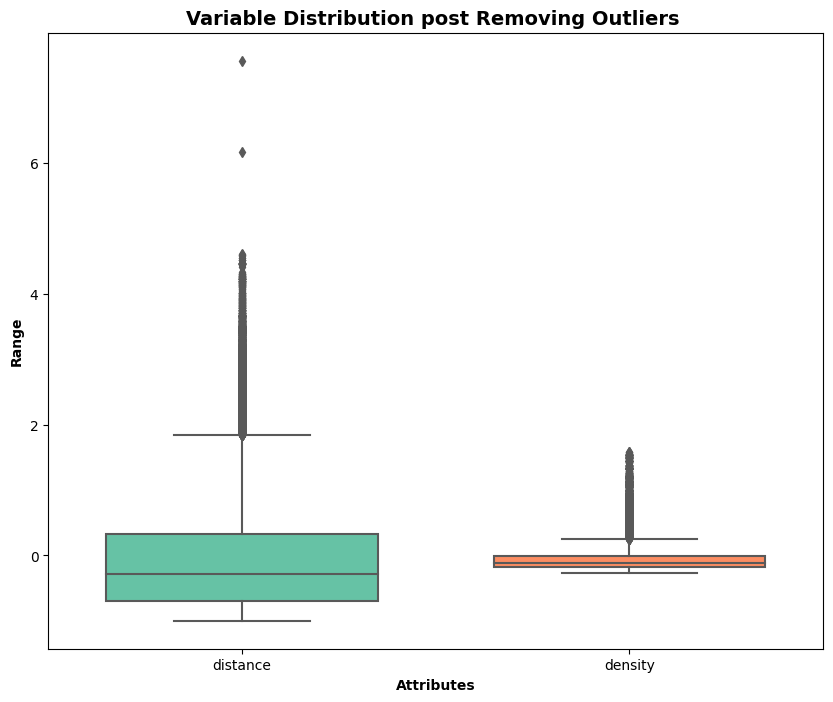

In [352]:
#plotting post removing outliers
attributes = ['distance','density']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = model_df[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Variable Distribution post Removing Outliers ", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.show()

In [353]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(model_df.iloc[:,:-1], model_df.iloc[:,-1], test_size=0.3, random_state=42)

In [354]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [355]:
y_prediction =  LR.predict(X_test)
y_prediction

array([11.8948229 , 12.579655  , 11.86627513, ..., 11.88987976,
       11.89898869, 12.00967208])

In [358]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 score is",score)
print("mean_sqrd_error is=",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is=",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is 0.0003933494583394648
mean_sqrd_error is= 92.2605265518326
root_mean_squared error of is= 9.605234330917314


In [380]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=5
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [381]:
y_prediction =  polyreg.predict(X_test)
y_prediction

array([11.86968318, 12.44131063, 11.86797628, ..., 11.98322208,
       11.92772898, 11.97279575])

In [382]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 score is",score)
print("mean_sqrd_error is=",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is=",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is 0.0004511438701818582
mean_sqrd_error is= 92.25519231074344
root_mean_squared error of is= 9.60495665324646


In [383]:
from keras.models import Sequential
from keras.layers import Dense

In [385]:
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [386]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=150, batch_size=10)